## Source Distribution

Added by TG, 
Goal: to understand if training data represented source distribution.

In [50]:
%matplotlib inline
import math
from matplotlib import pyplot as plt
params = {
    'font.size': 22,
    'font.family':'sans-serif',
    'font.sans-serif':['Helvetica'],
    'text.usetex': True
    }
plt.rcParams.update(params)

In [21]:
inp = "digg-domain-stats.tsv"
with open(inp) as f:
    data = [(r[0], int(r[1])) for r in 
            (l.split() for l in f.readlines())]
k = 20
total = sum(x[1] for x in data)
top_k = sum(x[1] for x in data[:k])
rest_k = sum(x[1] for x in data[k:])
data[:k], total, top_k/total, rest_k/total

([('backpage.com', 40709503),
  ('liveescortreviews.com', 32001856),
  ('eroticmugshots.com', 13131063),
  ('escortphonelist.com', 7905919),
  ('escortsincollege.com', 6851276),
  ('escortads.xxx', 3888895),
  ('escortsinthe.us', 3581716),
  ('cityxguide.com', 2368640),
  ('craigslist.org', 1214603),
  ('myproviderguide.com', 1214144),
  ('massagetroll.com', 1035297),
  ('theeroticreview.com', 973013),
  ('asexyservice.com', 894562),
  ('eccie.net', 780729),
  ('naughtyreviews.com', 698245),
  ('cityvibe.com', 670907),
  ('escortsin.ca', 449308),
  ('backpage.ca', 382207),
  ('backpage.mx', 348823),
  ('utopiaguide.com', 243563)],
 121191570,
 0.9847571823683776,
 0.015242817631622397)

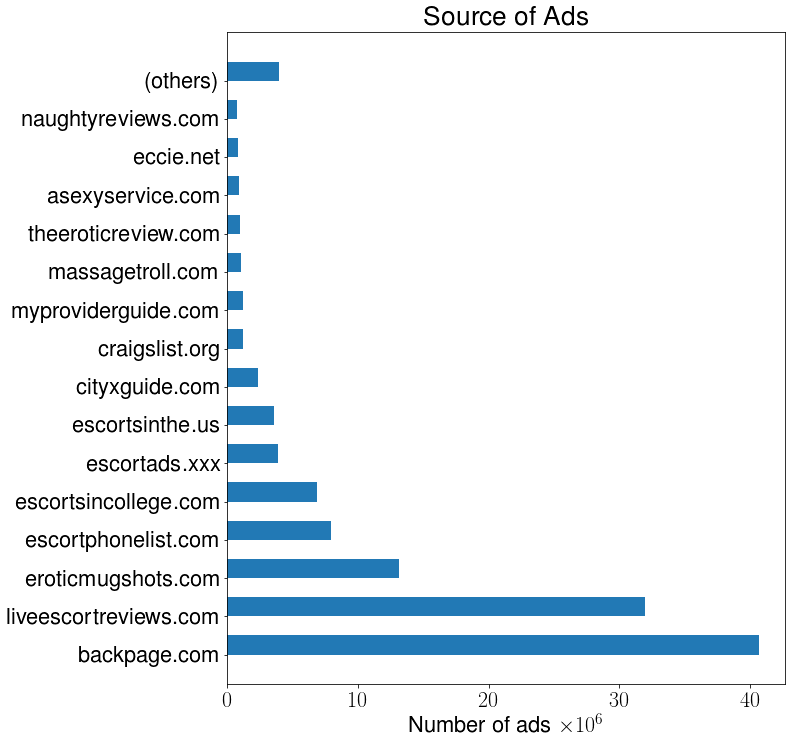

In [72]:
def show_map(data, k=20, norm=1e6, title='Source of Ads'):
    
    data_top = data[:k]
    data_top.append(('(others)', sum(x[1] for x in data[k:])))
    sites = [x[0] for x in data_top]
    counts = [x[1] / norm for x in data_top]

    y_pos = list(range(len(sites)))

    plt.figure(figsize=(10, 12))
    plt.barh(y_pos, counts, align='edge', alpha=0.99, height=0.5)
    plt.yticks(y_pos, sites)
    plt.xlabel(r'Number of ads $ \times 10^%d$' % math.log10(norm))
    plt.title(title)
    plt.show()

show_map(data, k=15, norm=1e6)

## Training Data

In [56]:
with open ('2016-summer-cp1-train-sites.txt') as f:
    train_stats = [(r[1], int(r[0])) for r in 
            (l.split() for l in f.readlines())]
train_stats[:10]

[('liveescortreviews.com', 116850),
 ('eroticmugshots.com', 43167),
 ('backpage.com', 23195),
 ('escortads.xxx', 4350),
 ('escortphonelist.com', 4306),
 ('escortsincollege.com', 3973),
 ('escortsinthe.us', 2209),
 ('escortsin.ca', 2020),
 ('cityxguide.com', 984),
 ('myproviderguide.com', 663)]

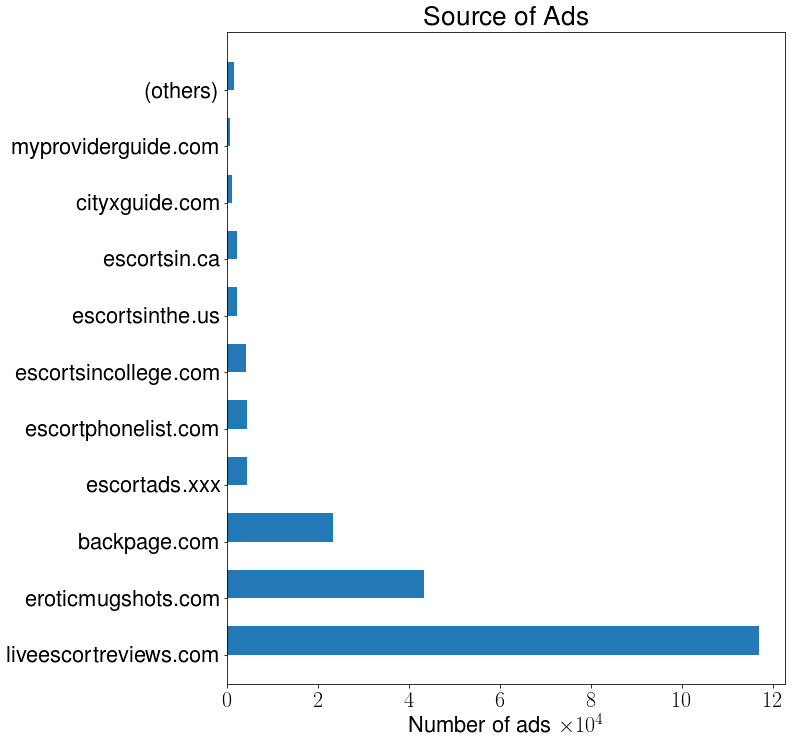

In [73]:
show_map(train_stats, k=10, norm=1e4)